In [74]:
import numpy as np
import pandas as pd

In [75]:
# Possible encodings to try
encodings = ['utf-8','latin1','ISO-8859-1','cp1252']

file = 'spam.csv'

# Attempt to read the CSV file with different encodings
for encoding in encodings:
    try:
        df = pd.read_csv(file, encoding = encoding)
        print(f'File successfully read with encoding: {encoding}')
        break # Stop the loop if successful
    except UnicodeDecodeError:
        print(f'Failed to read with encoding: {encoding}')
        continue # try thr next encoding
    
# If the loop completes without success, df will not be defined
if 'df' in locals():
    print('CSV file has been successfully loaded')
else:
    print('All encoding attempts failed.Unable to read the csv file.')


Failed to read with encoding: utf-8
File successfully read with encoding: latin1
CSV file has been successfully loaded


In [77]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1335,ham,"Sometimes we put walls around our hearts,not j...",NaN,NaN,NaN
1985,ham,The length is e same but e top shorter n i got...,NaN,NaN,NaN
5094,ham,"Hi Shanil,Rakhesh here.thanks,i have exchanged...",NaN,NaN,NaN
1574,ham,My sis is catching e show in e afternoon so i'...,NaN,NaN,NaN
2076,ham,"Trust me. Even if isn't there, its there.",NaN,NaN,NaN


In [78]:
df.shape

(5572, 5)

In [79]:
# Data cleaning
# EDA
# Text preprocessing 
# Model building
# Evaluation
# Improvement 
# Website
# Deploy

## 1.Data Cleaning

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [81]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [82]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [83]:
df.sample(5)

,v1,v2
3136,ham,You're right I have now that I think about it
2681,ham,I'm on da bus going home...
1787,ham,Yes:)sura in sun tv.:)lol.
2764,ham,Open rebtel with firefox. When it loads just p...
2392,ham,"Thanks da thangam, i feel very very happy dear..."


In [84]:
# renaming the cols
df.rename(columns= {'v1':'Target','v2':'Text'},inplace=True)
df.sample(5)

,Target,Text
4169,ham,"Mmmmmm ... I love you,so much, Ahmad ... I can..."
5484,ham,", , and picking them up from various points ..."
1024,ham,Hasn't that been the pattern recently crap wee...
4389,ham,Do you know why god created gap between your f...
5025,spam,Ur cash-balance is currently 500 pounds - to m...


In [85]:
# Encoding the target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Target'] = encoder.fit_transform(df['Target'])
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [86]:
# check missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [87]:
# check duplicate values
df.duplicated().sum()

403

In [88]:
# drop duplicates
df = df.drop_duplicates(keep='first')

In [89]:
df.duplicated().sum()

0

In [90]:
df.shape

(5169, 2)

## EDA (Exploratory Data Analysis)

In [91]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [92]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

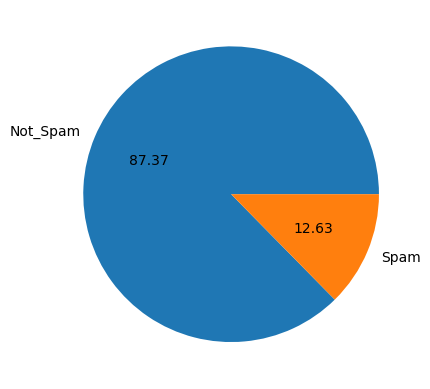

In [93]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['Not_Spam','Spam'],autopct='%0.2f')
plt.show()

In [94]:
# High chunk of Not Spam data and very less of Spam Data, So our data is imbalanced. 

In [95]:
!pip install nltk

In [96]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Shubham Pawar
[nltk_data]     SP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [97]:
df['num_of_characters'] = df['Text'].apply(len)
df.head()

,Target,Text,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [98]:
# number of words
df['num_words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [99]:
df.head()

,Target,Text,num_of_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [100]:
# number of sent
df['num_sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [101]:
df.rename(columns= {'num_of_characters':'num_characters'},inplace=True)

In [102]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [103]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [104]:
# Not spam
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [105]:
# Spam
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

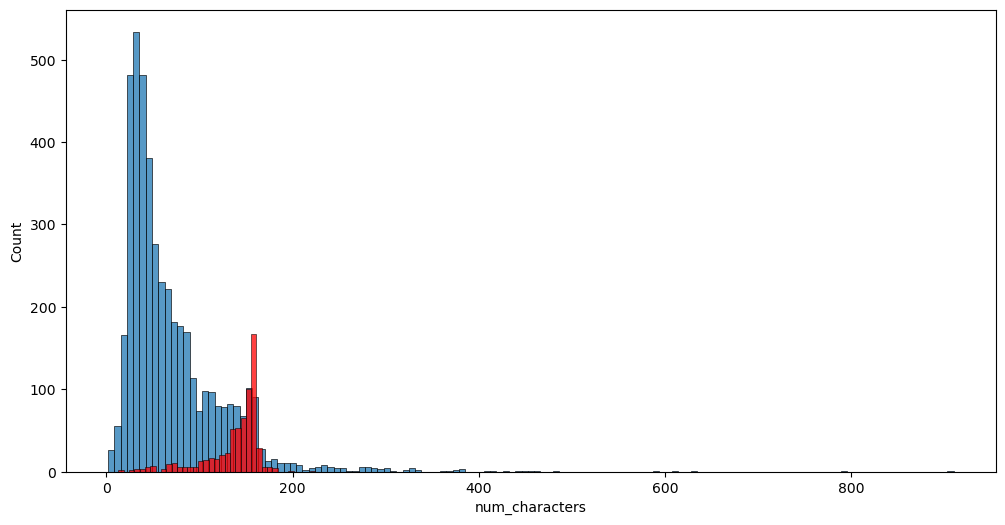

In [106]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

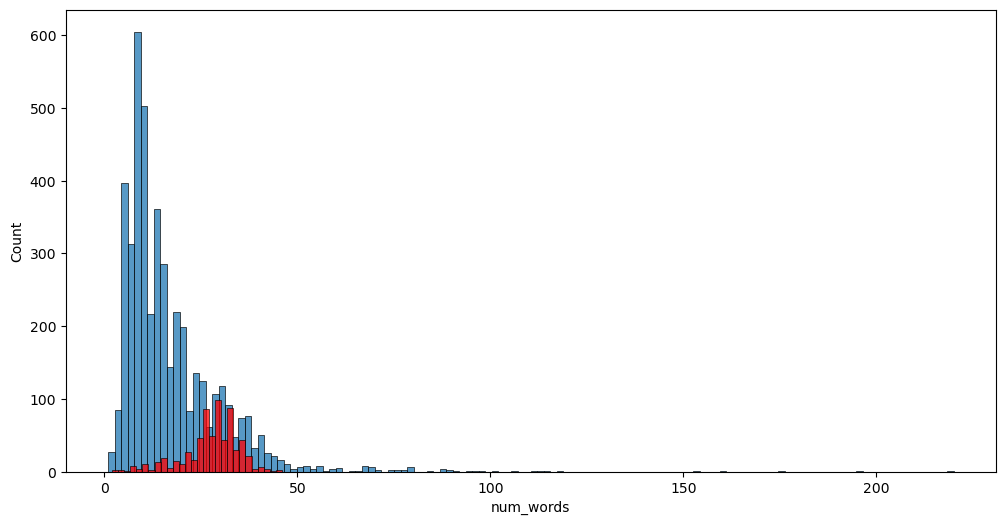

In [107]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'], color = 'red')

C:\Users\Shubham Pawar SP\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


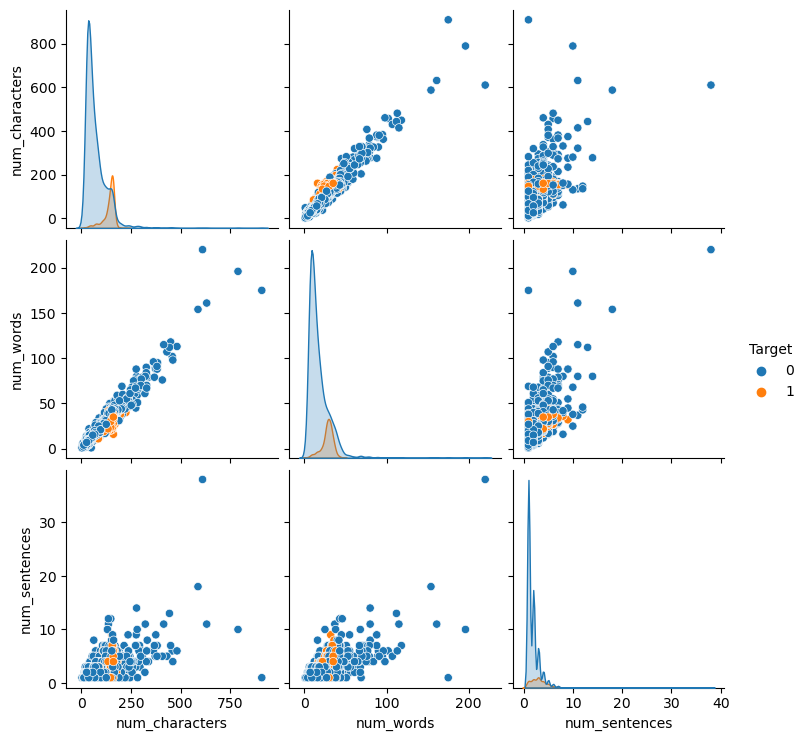

In [108]:
sns.pairplot(df, hue='Target')

<Axes: >

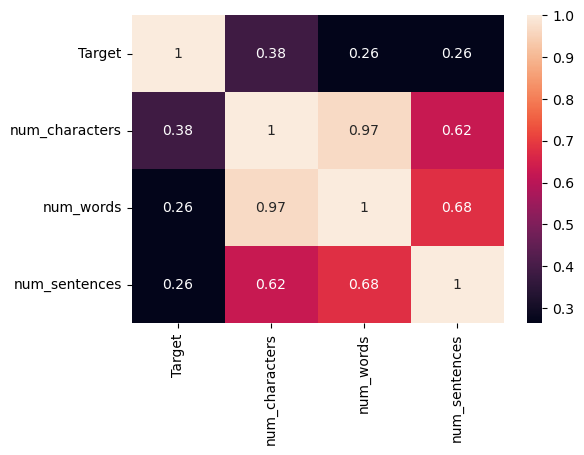

In [113]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Target','num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

## Data Preprocessing

In [ ]:
# Lower case
# Tokenization
# Removing special characters
# Removing stopwords and punctuations
# stemming

In [137]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to C:\Users\Shubham Pawar
[nltk_data]     SP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [138]:
ps = PorterStemmer()

In [144]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)

gon na home soon want talk stuff anymor tonight k cri enough today


In [143]:
# df['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [145]:
# ps.stem('walking')

'walk'

In [146]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [147]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,10,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,10,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,10,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,10,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,10,nah think goe usf live around though


In [149]:
# !pip install wordcloud

In [158]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [159]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep = " "))

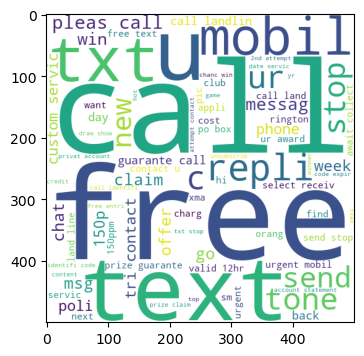

In [160]:
plt.figure(figsize=(10,4))
plt.imshow(spam_wc)

In [162]:
not_spam_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep = " "))

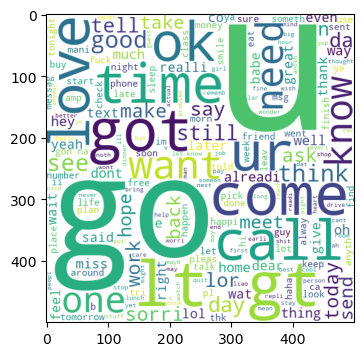

In [163]:
plt.figure(figsize=(10,4))
plt.imshow(spam_wc)

In [164]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,10,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,10,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,10,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,10,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,10,nah think goe usf live around though


In [165]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

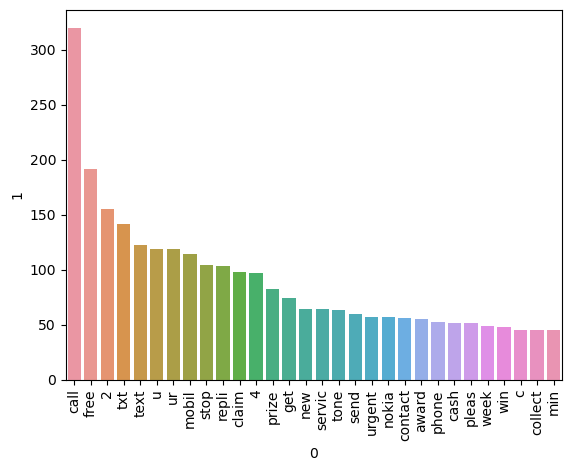

In [167]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [170]:
not_spam_corp = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        not_spam_corp.append(word)
len(not_spam_corp)

35404

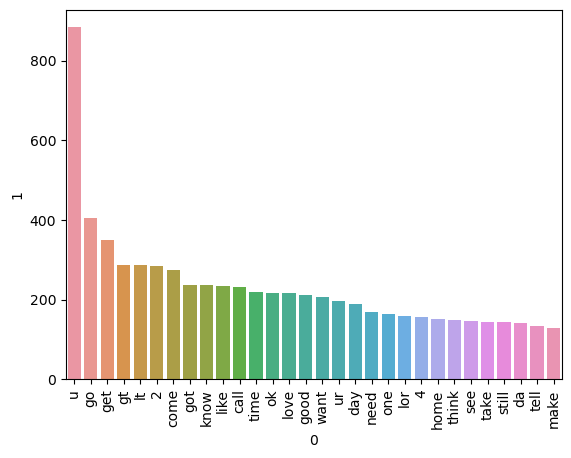

In [171]:
sns.barplot(x = pd.DataFrame(Counter(not_spam_corp).most_common(30))[0], y = pd.DataFrame(Counter(not_spam_corp).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Building Model

In [172]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features= 3000)

In [190]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [185]:
# x1 = cv.fit_transform(df['transformed_text']).toarray()

In [174]:
x.shape

(5169, 3000)

In [191]:
y = df['Target'].values

In [187]:
# y1 = df['Target'].values

In [177]:
from sklearn.model_selection import train_test_split

In [192]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state= 2)

In [188]:
# x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size= 0.2, random_state= 2)

In [179]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [193]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [194]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [195]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [196]:
bnb.fit(x_train,y_train)
y_pred1 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [198]:
# !pip install xgboost

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [208]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth= 5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators= 50,random_state= 2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators= 50, random_state= 2)
etc = ExtraTreesClassifier(n_estimators= 50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators= 50, random_state= 2)
xgb = XGBClassifier(n_estimators= 50, random_state= 2)

In [209]:
clfs ={
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'Xgb':xgb
}

In [210]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [211]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [212]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print('For ',name)
    print('Accuraccy:',current_accuracy)
    print('Precision:',current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuraccy: 0.9758220502901354
Precision: 0.9747899159663865
For  KN
Accuraccy: 0.9052224371373307
Precision: 1.0
For  NB
Accuraccy: 0.9709864603481625
Precision: 1.0
For  DT
Accuraccy: 0.9323017408123792
Precision: 0.8333333333333334
For  LR
Accuraccy: 0.9584139264990329
Precision: 0.9702970297029703
For  RF
Accuraccy: 0.9758220502901354
Precision: 0.9829059829059829
For  Adaboost
Accuraccy: 0.960348162475822
Precision: 0.9292035398230089
For  Bgc
Accuraccy: 0.9584139264990329
Precision: 0.8682170542635659
For  ETC
Accuraccy: 0.9748549323017408
Precision: 0.9745762711864406
For  GBDT
Accuraccy: 0.9468085106382979
Precision: 0.9191919191919192
For  Xgb
Accuraccy: 0.9671179883945842
Precision: 0.9262295081967213


In [213]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [214]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,Adaboost,0.960348,0.929204
10,Xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,Bgc,0.958414,0.868217


In [226]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')

In [229]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,Adaboost,Accuracy,0.960348
7,Xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,Bgc,Accuracy,0.958414


C:\Users\Shubham Pawar SP\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


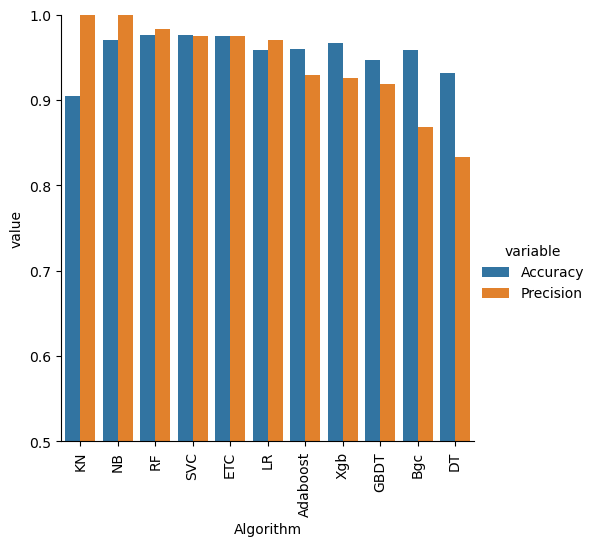

In [231]:
sns.catplot(x ='Algorithm', y = 'value', 
           hue = 'variable', data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve : change the parameters of TfIdf

In [240]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_num_chars':accuracy_scores, 'Precision_max_feat_3000':precision_scores}).sort_values('Precision_max_feat_3000', ascending=False)

In [241]:
new_df = performance_df.merge(temp_df, on = 'Algorithm')

In [242]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_num_chars,Precision_max_feat_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,Adaboost,0.960348,0.929204,0.960348,0.929204
7,Xgb,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192
9,Bgc,0.958414,0.868217,0.958414,0.868217


In [243]:
new_df_scaled = new_df.merge(temp_df, on='Algorithm')

In [244]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_num_chars_x,Precision_max_feat_3000_x,Accuracy_num_chars_y,Precision_max_feat_3000_y
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,Adaboost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,Xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,Bgc,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [245]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_num_chars':accuracy_scores, 'Precision_max_feat_3000':precision_scores}).sort_values('Precision_max_feat_3000', ascending=False)

In [246]:
new_df_scaled.merge(temp_df, on = 'Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_num_chars_x,Precision_max_feat_3000_x,Accuracy_num_chars_y,Precision_max_feat_3000_y,Accuracy_num_chars,Precision_max_feat_3000
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,Adaboost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,Xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,Bgc,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [247]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma = 1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
 
from sklearn.ensemble import VotingClassifier

In [249]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)], voting='soft')

In [250]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [251]:
y_pred = voting.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [252]:
# Applying Stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [253]:
from sklearn.ensemble import StackingClassifier

In [254]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [255]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [256]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [257]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# sample text data and corresponding labels (replace with your actual data)
x_train = ['Sample text 1','Sample text 2','Sample text 3']
y_train = [0,1,0]

# create and train Tfidf vectorizer
tfidf = TfidfVectorizer(lowercase=True,stop_words= 'english')
x_train_tfidf = tfidf.fit_transform(x_train)

# create and train naive_bayes classifier
mnb = MultinomialNB()
mnb.fit(x_train_tfidf,y_train)

# Save the trained Tfidf vectorizer and Naive Bayes model to files
with open('vectorizer.pkl','wb') as vectorize_file:
    pickle.dump(tfidf,vectorize_file)
    
with open('model.pkl','wb') as model_file:
    pickle.dump(mnb, model_file)